In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("Mental Health Dataset.csv")
# df.head()
df

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure
292360,8/17/2015 9:38,Male,South Africa,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes


In [3]:
df.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

In [4]:
df.bfill(inplace=True)
df.ffill(inplace=True)
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [5]:
df.isnull().sum()

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64

In [6]:
df = df.drop('Timestamp',axis=1)

In [7]:
column = df.columns.tolist()

In [8]:
f = {'No': 0, 'Not sure': 1, 'Yes': 2}

In [9]:
print(dict(map(reversed, f.items())))

{0: 'No', 1: 'Not sure', 2: 'Yes'}


In [10]:
# Convert text labels to numerical labels
for i in column:
    label_encoder = LabelEncoder()
    df[i] = label_encoder.fit_transform(df[i])
    
    # Get the mapping of labels
    label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"{i} Label mapping: {label_mapping}\n")

Gender Label mapping: {'Female': 0, 'Male': 1}

Country Label mapping: {'Australia': 0, 'Belgium': 1, 'Bosnia and Herzegovina': 2, 'Brazil': 3, 'Canada': 4, 'Colombia': 5, 'Costa Rica': 6, 'Croatia': 7, 'Czech Republic': 8, 'Denmark': 9, 'Finland': 10, 'France': 11, 'Georgia': 12, 'Germany': 13, 'Greece': 14, 'India': 15, 'Ireland': 16, 'Israel': 17, 'Italy': 18, 'Mexico': 19, 'Moldova': 20, 'Netherlands': 21, 'New Zealand': 22, 'Nigeria': 23, 'Philippines': 24, 'Poland': 25, 'Portugal': 26, 'Russia': 27, 'Singapore': 28, 'South Africa': 29, 'Sweden': 30, 'Switzerland': 31, 'Thailand': 32, 'United Kingdom': 33, 'United States': 34}

Occupation Label mapping: {'Business': 0, 'Corporate': 1, 'Housewife': 2, 'Others': 3, 'Student': 4}

self_employed Label mapping: {'No': 0, 'Yes': 1}

family_history Label mapping: {'No': 0, 'Yes': 1}

treatment Label mapping: {'No': 0, 'Yes': 1}

Days_Indoors Label mapping: {'1-14 days': 0, '15-30 days': 1, '31-60 days': 2, 'Go out Every day': 3, 'More th

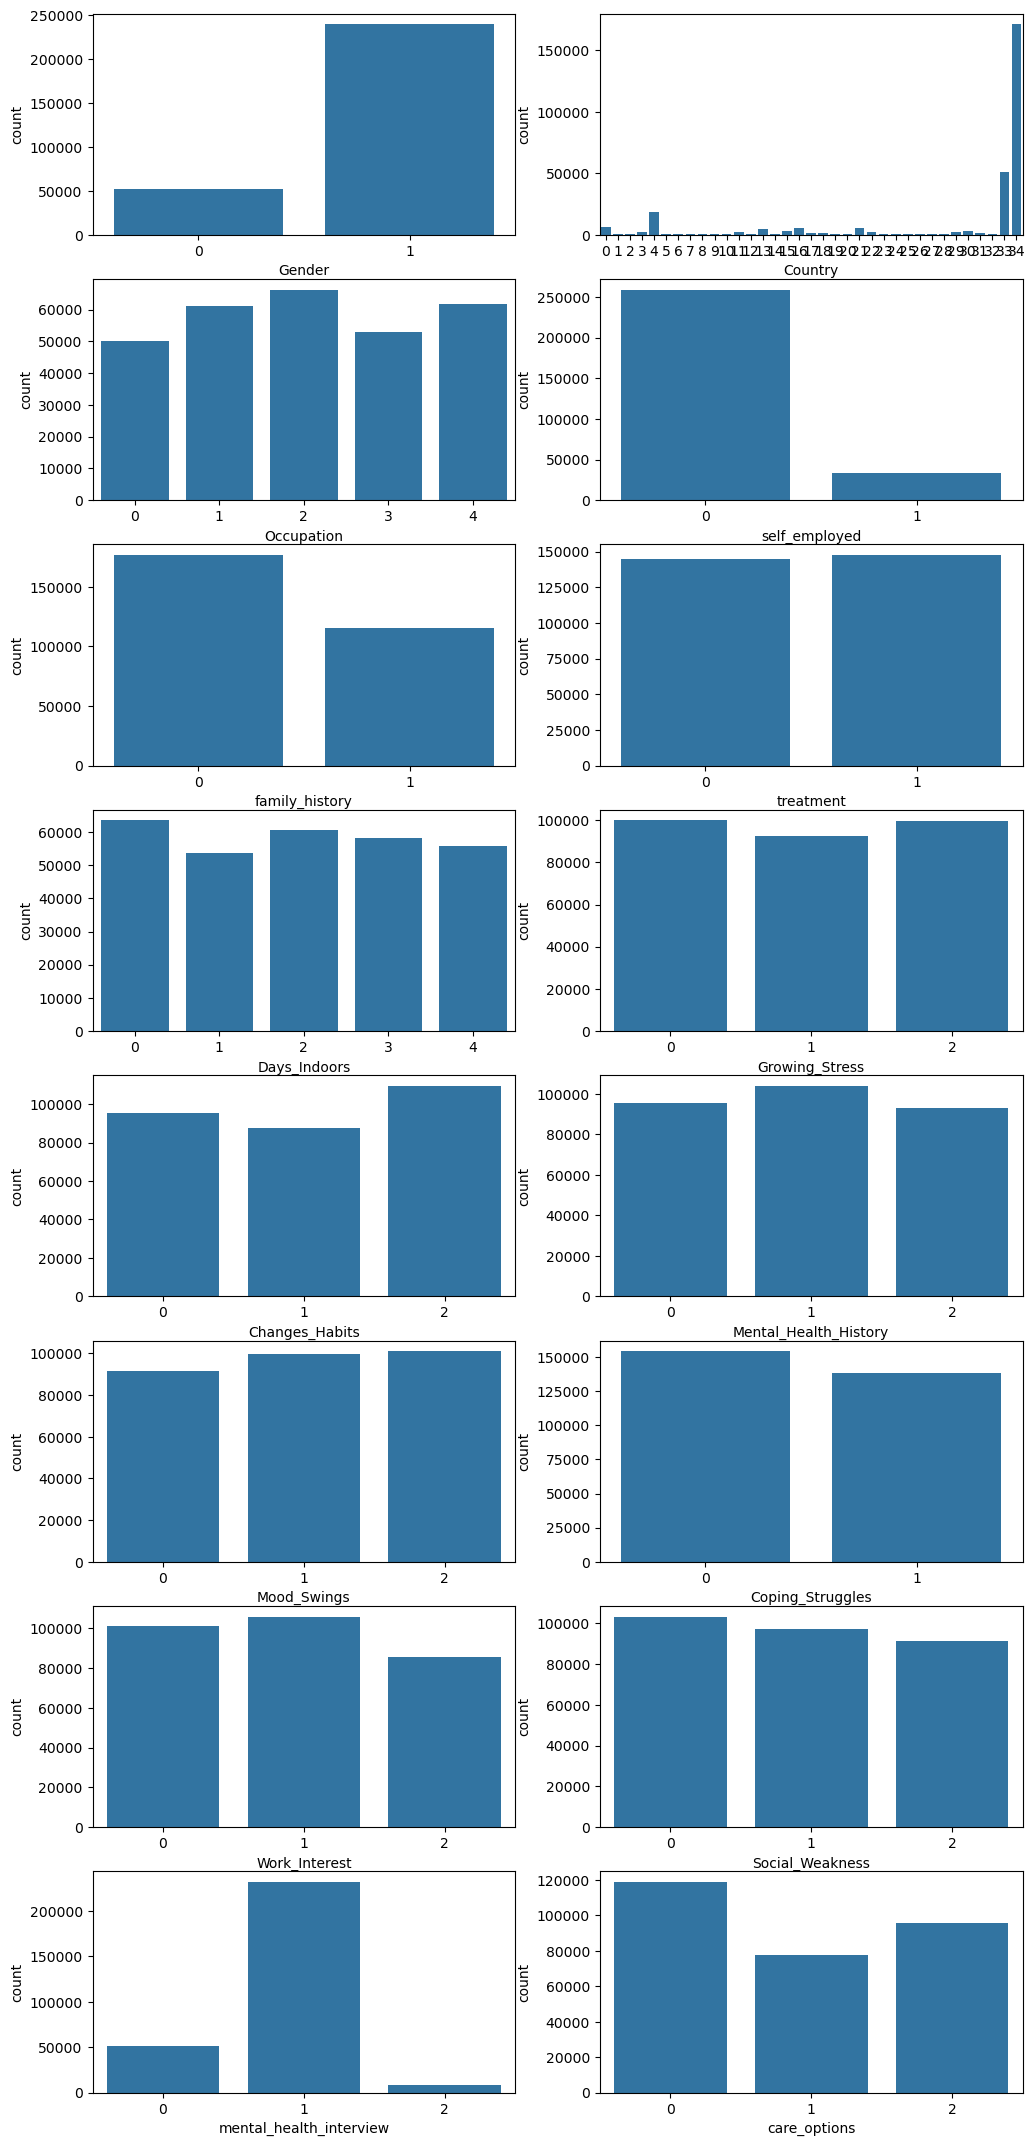

In [39]:
plt.figure(figsize=(12,27))
for i in range(0,16):
    plt.subplot(8,2,i+1)
    sns.countplot(x=df[column[i]])

plt.show()

# Train test Split

In [11]:
x=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12,13,14,15]].values
y=df.iloc[:, 10].values

In [12]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((233891, 15), (233891,), (58473, 15), (58473,))

# KNN model

In [13]:
KNN_accuracies = []
for i in range(1,30):
    KNN_clf = KNeighborsClassifier(n_neighbors=i,n_jobs=-1,algorithm='ball_tree',weights='distance',leaf_size=40)
    KNN_clf.fit(x_train,y_train)
    y_pred = KNN_clf.predict(x_test)
    KNN_accuracies.append(accuracy_score(y_test, y_pred))

In [16]:
no_neighbors = [i for i in range(1, 30)]

Maximum Accuracy: 0.9500624219725343 with nearest neighbors: 6


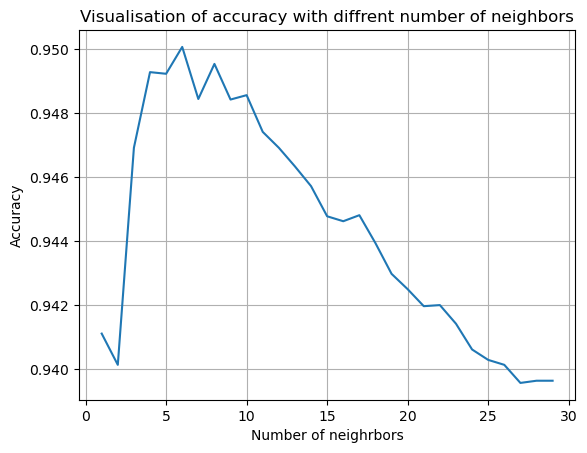

In [17]:
plt.grid()
sns.lineplot(x=no_neighbors,y=KNN_accuracies)
plt.title("Visualisation of accuracy with diffrent number of neighbors")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighrbors")
print(f"Maximum Accuracy: {max(KNN_accuracies)} with nearest neighbors: {KNN_accuracies.index(max(KNN_accuracies))+1}")
plt.show()

In [21]:
KNN_clf.get_params()

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'distance'}

# Decision Tree

In [18]:
max_features = [0.75,None]
max_depth = [None]
min_samples_leaf = [60]
min_samples_split = [2,3,5]

In [19]:
param_grid = {"max_features":max_features,
             "max_depth":max_depth,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf}

In [20]:
dt_clf = DecisionTreeClassifier(criterion = 'entropy',class_weight={0:0.03644341,1:0.03338876,2:0.0329824})

In [21]:
dt_grid = GridSearchCV(estimator = dt_clf,
                      param_grid=param_grid,
                      cv = 5,
                      verbose = 2,
                      n_jobs = -1)

In [22]:
dt_grid.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 0.03644341,
                                                            1: 0.03338876,
                                                            2: 0.0329824},
                                              criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': [0.75, None],
                         'min_samples_leaf': [60],
                         'min_samples_split': [2, 3, 5]},
             verbose=2)

In [23]:
dt_grid.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 60,
 'min_samples_split': 2}

In [24]:
dt_grid.best_score_

0.9783617163026767

In [26]:
dt_clf1 = DecisionTreeClassifier(max_depth= None,max_features= None,min_samples_leaf=60,min_samples_split=2,criterion = 'gini',class_weight={0:0.03644341,1:0.03338876,2:0.0329824})
dt_clf1.fit(x_train, y_train)
y_pred2 = dt_clf1.predict(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred2)*100)
cm = confusion_matrix(y_test, y_pred2)
print(cm)

Accuracy:  97.70150325791391
[[17830    63   219]
 [  128 19819   173]
 [  590   171 19480]]


In [28]:
print(classification_report(y_test, y_pred2,target_names=['High','Low','Medium']))

              precision    recall  f1-score   support

        High       0.96      0.98      0.97     18112
         Low       0.99      0.99      0.99     20120
      Medium       0.98      0.96      0.97     20241

    accuracy                           0.98     58473
   macro avg       0.98      0.98      0.98     58473
weighted avg       0.98      0.98      0.98     58473



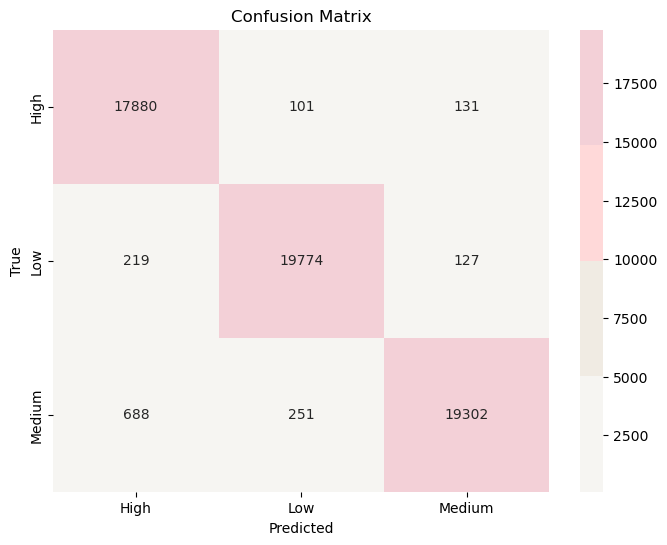

In [114]:
classes = ['High','Low','Medium']
blue = ['#F6F5F2','#F0EBE3','#ffd9d9','#F3D0D7']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=blue,xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [78]:
weights = 10000 / (3 * np.bincount(df["Mood_Swings"]))
print(weights)

[0.03644341 0.03338876 0.0329824 ]


In [102]:
LR_clf = LogisticRegression(max_iter=10000,class_weight={0:0.03644341,1:0.03338876,2:0.0329824},n_jobs=-1)

In [103]:
LR_clf.fit(x_train,y_train)
y_pred1 = LR_clf.predict(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred1)*100)

Accuracy:  40.61190634993929


# SVM

In [11]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
SVM_accuracies = []
for i in kernel:
    SVC_clf = SVC(kernel=i,class_weight={0:0.03644341,1:0.03338876,2:0.0329824},max_iter=1000).fit(x_train,y_train)
    y_pred = SVC_clf.predict(x_test)
    SVM_accuracies.append(accuracy_score(y_test, y_pred))
    print(SVM_accuracies)

C:\Users\Raunak Gola\code editor\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[0.3097497990525542]


C:\Users\Raunak Gola\code editor\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[0.3097497990525542, 0.34615976604586735]


C:\Users\Raunak Gola\code editor\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[0.3097497990525542, 0.34615976604586735, 0.3097497990525542]


C:\Users\Raunak Gola\code editor\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[0.3097497990525542, 0.34615976604586735, 0.3097497990525542, 0.3097497990525542]


Maximum Accuracy 0.34615976604586735 with nearest neighbors: poly


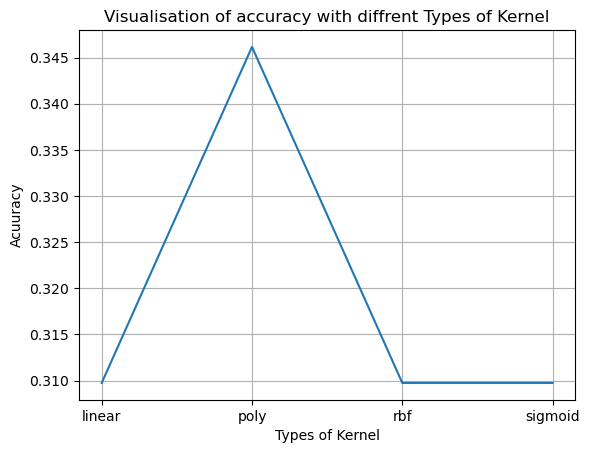

In [25]:
plt.grid()
sns.lineplot(x=kernel,y=SVM_accuracies)
plt.title("Visualisation of accuracy with diffrent Types of Kernel")
plt.ylabel("Acuuracy")
plt.xlabel("Types of Kernel")
print(f"Maximum Accuracy {max(SVM_accuracies)} with nearest neighbors: {kernel[SVM_accuracies.index(max(SVM_accuracies))]}")
plt.show()

In [99]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('svc', SVC(kernel='poly',degree=7,class_weight={0:0.03644341,1:0.03338876,2:0.0329824},max_iter=100000))])

pipe.fit(x_train, y_train).score(x_test, y_test)


C:\Users\Raunak Gola\code editor\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.9731157970345288

In [19]:
y_pred3 = pipe.predict(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred3)*100)

Accuracy:  97.40564021001146


In [20]:
cm = confusion_matrix(y_test, y_pred3)
print(cm)

[[17880   101   131]
 [  219 19774   127]
 [  688   251 19302]]


# Naive Bayes

## Gaussian NB

In [26]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
gnb_clf = GaussianNB()
y_pred_gnb = gnb_clf.fit(x_train, y_train).predict(x_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (x_test.shape[0], (y_test != y_pred_gnb).sum()))

Number of mislabeled points out of a total 58473 points : 33181


In [27]:
accuracy_score(y_test, y_pred_gnb)

0.4325415148872129

In [31]:
# CV
scores = cross_val_score(gnb_clf, x, y, cv=7,n_jobs=-1)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.31285465 0.39325305 0.32627017 0.381291   0.40731696 0.39007805
 0.43817938]
0.38 accuracy with a standard deviation of 0.04


## Multinomial NB

In [32]:
mnb_clf = MultinomialNB()
mnb_clf.fit(x_train, y_train)
y_pred_mnb = mnb_clf.predict(x_test)
accuracy_score(y_test, y_pred_mnb)

0.4326099225283464

In [33]:
# CV
scores = cross_val_score(mnb_clf, x, y, cv=7,n_jobs=-1)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.30820983 0.43515215 0.33556002 0.39970311 0.37482641 0.41382943
 0.45730977]
0.39 accuracy with a standard deviation of 0.05


# Random Forest

In [42]:
n_estimators = [10,20,40]
max_features = [0.25,0.50,0.75]
max_depth = [None]
max_samples = [None]
min_samples_leaf = [1,2,3]
min_samples_split = [2,3]

In [43]:
param_grid = {"n_estimators":n_estimators,
             "max_features":max_features,
             "max_depth":max_depth,
             "max_samples":max_samples,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf}

In [44]:
rf = RandomForestClassifier(n_jobs=-1,class_weight={0:0.03644341,1:0.03338876,2:0.0329824})

In [45]:
rf_grid = GridSearchCV(estimator = rf,
                      param_grid=param_grid,
                      cv = 5,
                      verbose = 3,
                      n_jobs = -1)

In [46]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.03644341,
                                                            1: 0.03338876,
                                                            2: 0.0329824},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': [0.25, 0.5, 0.75],
                         'max_samples': [None], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [10, 20, 40]},
             verbose=3)

In [47]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.25,
 'max_samples': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 10}

In [48]:
rf_grid.best_score_

0.9762496189942382

In [92]:
rf_clf = RandomForestClassifier(max_depth=None,max_features=0.25,max_samples=None,min_samples_leaf=20,min_samples_split=2,n_estimators=40,class_weight={0:0.03644341,1:0.03338876,2:0.0329824})
rf_clf.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.03644341, 1: 0.03338876,
                                     2: 0.0329824},
                       max_features=0.25, min_samples_leaf=20, n_estimators=40)

In [93]:
y_pred1 = rf_clf.predict(x_test)

In [94]:
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
accuracy_score(y_test, y_pred1)

[[17827    97   188]
 [   98 19880   142]
 [  618   209 19414]]


0.9768782172968721

# Model Analysis

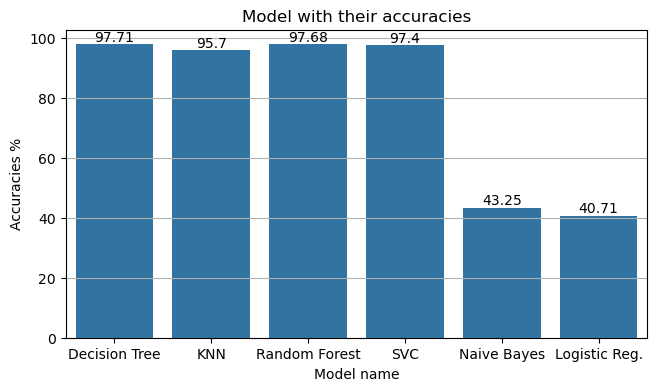

In [118]:
model_name = ['Decision Tree','KNN','Random Forest','SVC','Naive Bayes',"Logistic Reg."]
accuracy = [97.71,95.70,97.68,97.40,43.25,40.71]
plt.figure(figsize=(7.5,4))
plt.grid()
ax = sns.barplot(x=model_name,y=accuracy)#.bar_label(accuracy)
for i in ax.containers:
    ax.bar_label(i,)
# plt.xticks(rotation=90)
plt.title("Model with their accuracies")
plt.xlabel("Model name")
plt.ylabel("Accuracies %")
plt.show()

In [115]:
import pickle
pickle.dump(dt_clf1, open("DT_model.pkl","wb"))